# Predicting House Prices

[House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

# The scenario

The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.

# Steps

- Load the houseprices data from Thinkful's database.
- Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.
- Now, split your data into train and test sets where 20% of the data resides in the test set.
- Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!
- Evaluate your best model on the test set.

So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

In [1]:
# Loading the packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [2]:
# Loading dataset
house_prices.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [3]:
# Finding the unique values in our observations.
house_prices.nunique()

id               1460
mssubclass         15
mszoning            5
lotfrontage       110
lotarea          1073
                 ... 
mosold             12
yrsold              5
saletype            9
salecondition       6
saleprice         663
Length: 81, dtype: int64

Let's use Pandas .info() method to get a concise summary of the dataframe.

In [4]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

The dataset contains 1460 observations and 81 columns in total. There are numeric(int and float) and non-numeric attributes in our dataset.

It is also clear that not all features contain the same amount of rows. This could possibly be due to missing values and outliers in our dataset.

The following are the inherent features of our dataset:
    
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale
    

**Exploratory Analysis**

'SalePrice' is our target variable and we are trying to predict the price of the houses in Ames, Iowa. Let's explore the shape of the distribution of the different features in our dataset:

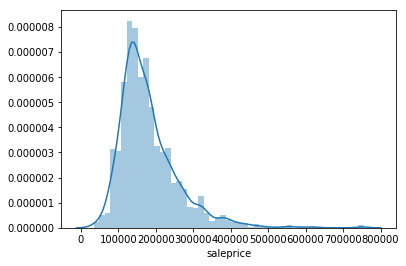

In [6]:
# Let's visualize the distribution through a histogram:
sns.distplot(house_prices['saleprice'])

We have a right skewed distribution for sales price, which means that our mean for sales price is greater than the median of the distribution.

Let's now visualize the other variables through histograms. I will choose five variables out of the 81 features because I believe that these variables may have a significant impact on the saleprice of a house.

Text(0.5, 1.0, 'Full Bathrooms above grade')

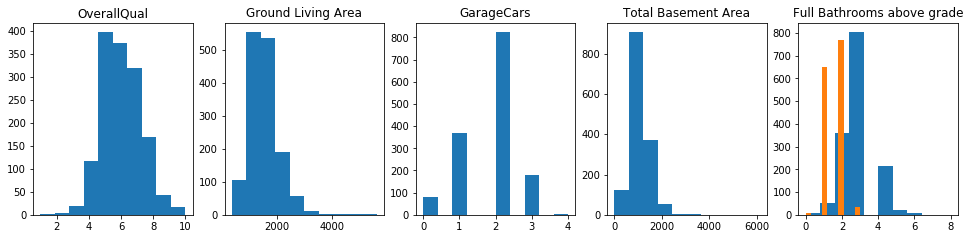

In [9]:
plt.figure(figsize = (20, 12))

plt.subplot(3,6,1)
plt.hist(house_prices["overallqual"])
plt.title("OverallQual")

plt.subplot(3,6,2)
plt.hist(house_prices["grlivarea"])
plt.title("Ground Living Area")

plt.subplot(3,6,3)
plt.hist(house_prices["garagecars"])
plt.title("GarageCars")

plt.subplot(3,6,4)
plt.hist(house_prices["totalbsmtsf"])
plt.title("Total Basement Area")

plt.subplot(3,6,5)
plt.hist(house_prices["bedroomabvgr"])
plt.title("Bedrooms")

plt.subplot(3,6,5)
plt.hist(house_prices["fullbath"])
plt.title("Full Bathrooms above grade")

'OverallQual' gives us a normal distribution which means that the data near the mean are more frequent in occurrence than data far from the mean. 'GroundLivArea' and 'TotalBasementArea' indicate right skewed distribution. 'GarageCars' and 'FullBath' does not provide us with a clear distribution whatsoever.

Let's find the statistics of our data through Pandas .describe() method:

In [10]:
# Descriptive Statistics
house_prices.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


Let's now detect the problems in out dataset. For this purpose, I will use the .isnull() function to detect our null values.

In [11]:
#missing data
total = house_prices.isnull().sum().sort_values(ascending=False)
percent = (house_prices.isnull().sum()/house_prices.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,0.995
miscfeature,1406,0.963
alley,1369,0.938
fence,1179,0.808
fireplacequ,690,0.473
lotfrontage,259,0.177
garagecond,81,0.055
garagetype,81,0.055
garageyrblt,81,0.055
garagefinish,81,0.055


We have 19 features with missing values, most of which are housing extras that may not significantly correlate with SalePrice. 

Let's now investigate the correlation of our features with our target variable 'saleprice'. For this purpose, I will use the numerical variables.

In [12]:
numeric_columns = house_prices.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [13]:
print("The number of numerical columns is {}".format(len(numeric_columns)))


np.abs(house_prices[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

The number of numerical columns is 38


saleprice       1.000
overallqual     0.791
grlivarea       0.709
garagecars      0.640
garagearea      0.623
totalbsmtsf     0.614
firstflrsf      0.606
fullbath        0.561
totrmsabvgrd    0.534
yearbuilt       0.523
yearremodadd    0.507
garageyrblt     0.486
masvnrarea      0.477
fireplaces      0.467
bsmtfinsf1      0.386
lotfrontage     0.352
wooddecksf      0.324
secondflrsf     0.319
openporchsf     0.316
halfbath        0.284
lotarea         0.264
bsmtfullbath    0.227
bsmtunfsf       0.214
bedroomabvgr    0.168
kitchenabvgr    0.136
enclosedporch   0.129
screenporch     0.111
poolarea        0.092
mssubclass      0.084
overallcond     0.078
mosold          0.046
threessnporch   0.045
yrsold          0.029
lowqualfinsf    0.026
miscval         0.021
bsmthalfbath    0.017
bsmtfinsf2      0.011
Name: saleprice, dtype: float64

There are 38 numeric columns and the variables that are highly correlated to SalePrice are: 'overallqual', 'grlivarea', 'garagecars', 'garagearea', and 'totalbsmtsf'. 

Let's now see if we have any outliers in our dataset:

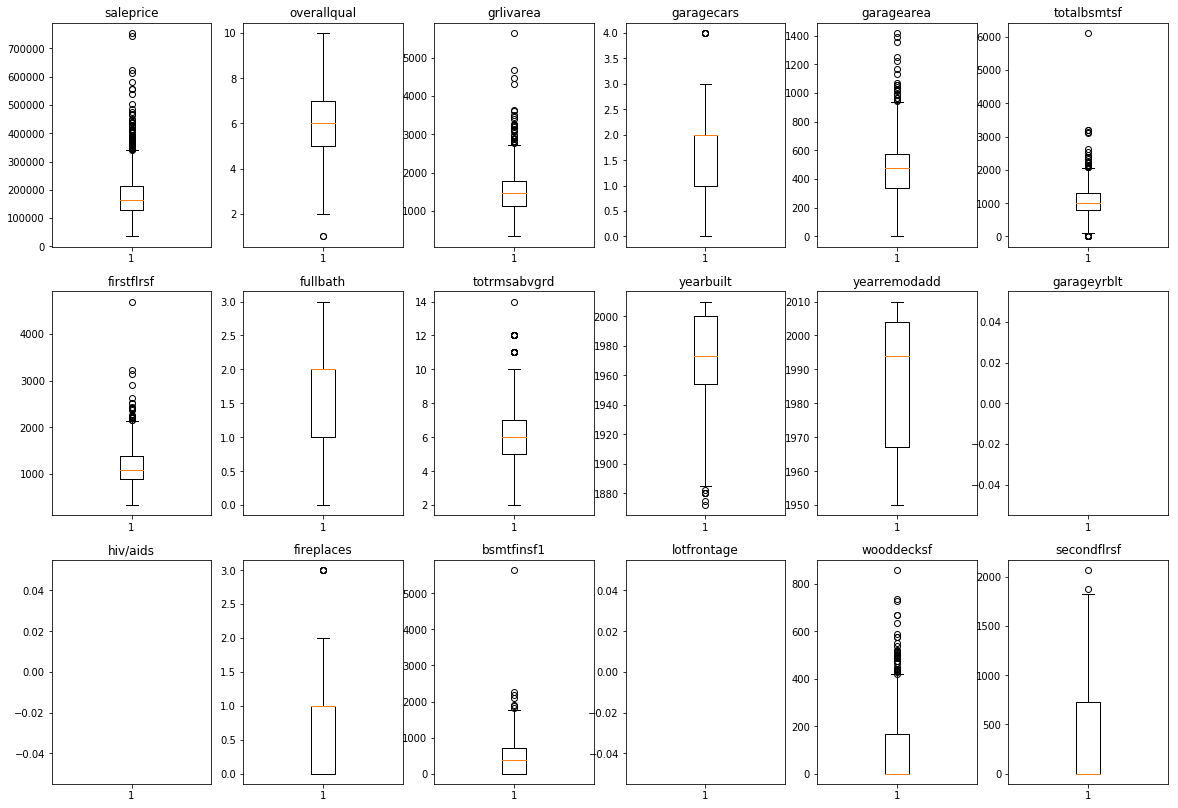

In [17]:
# Using the box plot to detect outliers.

plt.figure(figsize = (20, 14))

plt.subplot(3,6,1)
plt.boxplot(house_prices["saleprice"])
plt.title("saleprice")

plt.subplot(3,6,2)
plt.boxplot(house_prices["overallqual"])
plt.title("overallqual")

plt.subplot(3,6,3)
plt.boxplot(house_prices["grlivarea"])
plt.title("grlivarea")

plt.subplot(3,6,4)
plt.boxplot(house_prices["garagecars"])
plt.title("garagecars")

plt.subplot(3,6,5)
plt.boxplot(house_prices["garagearea"])
plt.title("garagearea")

plt.subplot(3,6,6)
plt.boxplot(house_prices["totalbsmtsf"])
plt.title("totalbsmtsf")

plt.subplot(3,6,7)
plt.boxplot(house_prices["firstflrsf"])
plt.title("firstflrsf")

plt.subplot(3,6,8)
plt.boxplot(house_prices["fullbath"])
plt.title("fullbath")

plt.subplot(3,6,9)
plt.boxplot(house_prices["totrmsabvgrd"])
plt.title("totrmsabvgrd")

plt.subplot(3,6,10)
plt.boxplot(house_prices["yearbuilt"])
plt.title("yearbuilt")

plt.subplot(3,6,11)
plt.boxplot(house_prices["yearremodadd"])
plt.title("yearremodadd")

plt.subplot(3,6,12)
plt.boxplot(house_prices["garageyrblt"])
plt.title("garageyrblt")

plt.subplot(3,6,13)
plt.boxplot(house_prices["masvnrarea"])
plt.title("hiv/aids")

plt.subplot(3,6,14)
plt.boxplot(house_prices["fireplaces"])
plt.title("fireplaces")

plt.subplot(3,6,15)
plt.boxplot(house_prices["bsmtfinsf1"])
plt.title("bsmtfinsf1")

plt.subplot(3,6,16)
plt.boxplot(house_prices["lotfrontage"])
plt.title("lotfrontage")

plt.subplot(3,6,17)
plt.boxplot(house_prices["wooddecksf"])
plt.title("wooddecksf")

plt.subplot(3,6,18)
plt.boxplot(house_prices["secondflrsf"])
plt.title("secondflrsf")

plt.show()

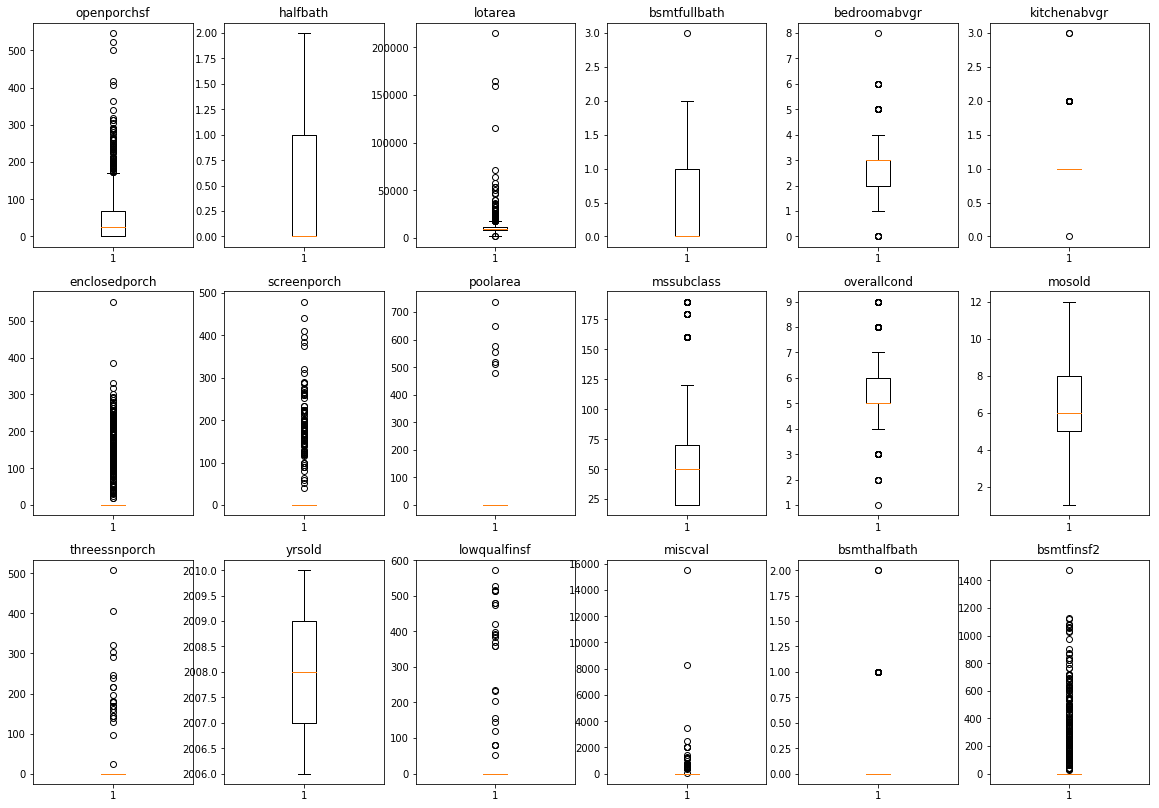

In [18]:
plt.figure(figsize = (20, 14))

plt.subplot(3,6,1)
plt.boxplot(house_prices["openporchsf"])
plt.title("openporchsf")

plt.subplot(3,6,2)
plt.boxplot(house_prices["halfbath"])
plt.title("halfbath")

plt.subplot(3,6,3)
plt.boxplot(house_prices["lotarea"])
plt.title("lotarea")

plt.subplot(3,6,4)
plt.boxplot(house_prices["bsmtfullbath"])
plt.title("bsmtfullbath")

plt.subplot(3,6,5)
plt.boxplot(house_prices["bedroomabvgr"])
plt.title("bedroomabvgr")

plt.subplot(3,6,6)
plt.boxplot(house_prices["kitchenabvgr"])
plt.title("kitchenabvgr")

plt.subplot(3,6,7)
plt.boxplot(house_prices["enclosedporch"])
plt.title("enclosedporch")

plt.subplot(3,6,8)
plt.boxplot(house_prices["screenporch"])
plt.title("screenporch")

plt.subplot(3,6,9)
plt.boxplot(house_prices["poolarea"])
plt.title("poolarea")

plt.subplot(3,6,10)
plt.boxplot(house_prices["mssubclass"])
plt.title("mssubclass")

plt.subplot(3,6,11)
plt.boxplot(house_prices["overallcond"])
plt.title("overallcond")

plt.subplot(3,6,12)
plt.boxplot(house_prices["mosold"])
plt.title("mosold")

plt.subplot(3,6,13)
plt.boxplot(house_prices["threessnporch"])
plt.title("threessnporch")

plt.subplot(3,6,14)
plt.boxplot(house_prices["yrsold"])
plt.title("yrsold")

plt.subplot(3,6,15)
plt.boxplot(house_prices["lowqualfinsf"])
plt.title("lowqualfinsf")

plt.subplot(3,6,16)
plt.boxplot(house_prices["miscval"])
plt.title("miscval")

plt.subplot(3,6,17)
plt.boxplot(house_prices["bsmthalfbath"])
plt.title("bsmthalfbath")

plt.subplot(3,6,18)
plt.boxplot(house_prices["bsmtfinsf2"])
plt.title("bsmtfinsf2")


plt.show()

**Data Cleaning**

Let's consider that when more than 15% of the data is missing, we should delete the corresponding variables.This means that we will not spend time in filling up these missing data. I chose to drop these variables because I believe that none of these are important when we consider buying a house.

In this case the variables that have more than 15% of missing data is: 'poolqc', 'miscfeature', 'alley', 'fence', 'fireplacequ', 'lotfrontage'. Let's drop these variables:

In [19]:
#dealing with missing data
house_prices = house_prices.drop((missing_data[missing_data['Total'] > 1]).index, 1)

To handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. 

In [20]:
# Checking to see out
house_prices.isnull().sum().max()

1

During our data exploration phase, we found that a lot of variables had a significant amount of outliers. To elimiate our outliers, let's use the winsorization technique:

In [25]:
from scipy.stats.mstats import winsorize

def using_mstats_df(numeric_columns):
    return df.apply(using_mstats, axis=0)

def using_mstats(numeric_columns):
    return mstats.winsorize(s, limits=[0.05, 0.05])

Now that we have handled the missing data and outliers let's move to correct the shape of the distribution of our target variable 'saleprice'.

Since 'saleprice' is not normal and shows a positive skewness (i.e. skewed to the right), let's apply log transformation to correct the shape of our distribution:

In [22]:
#applying log transformation
house_prices['saleprice'] = np.log(house_prices['saleprice'])

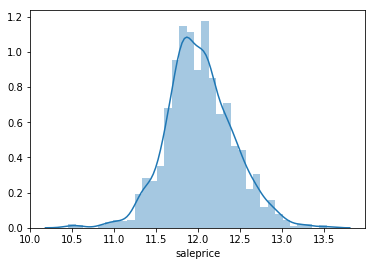

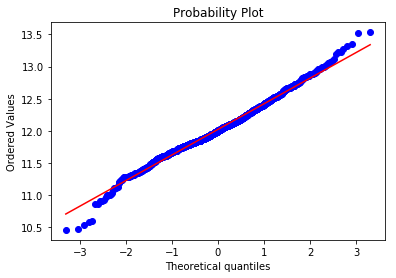

In [28]:
#transformed histogram and normal probability plot
sns.distplot(house_prices['saleprice']);
fig = plt.figure()
res = stats.probplot(house_prices['saleprice'], plot=plt)

Let's draw a correlation table to find out the correlation of the features:

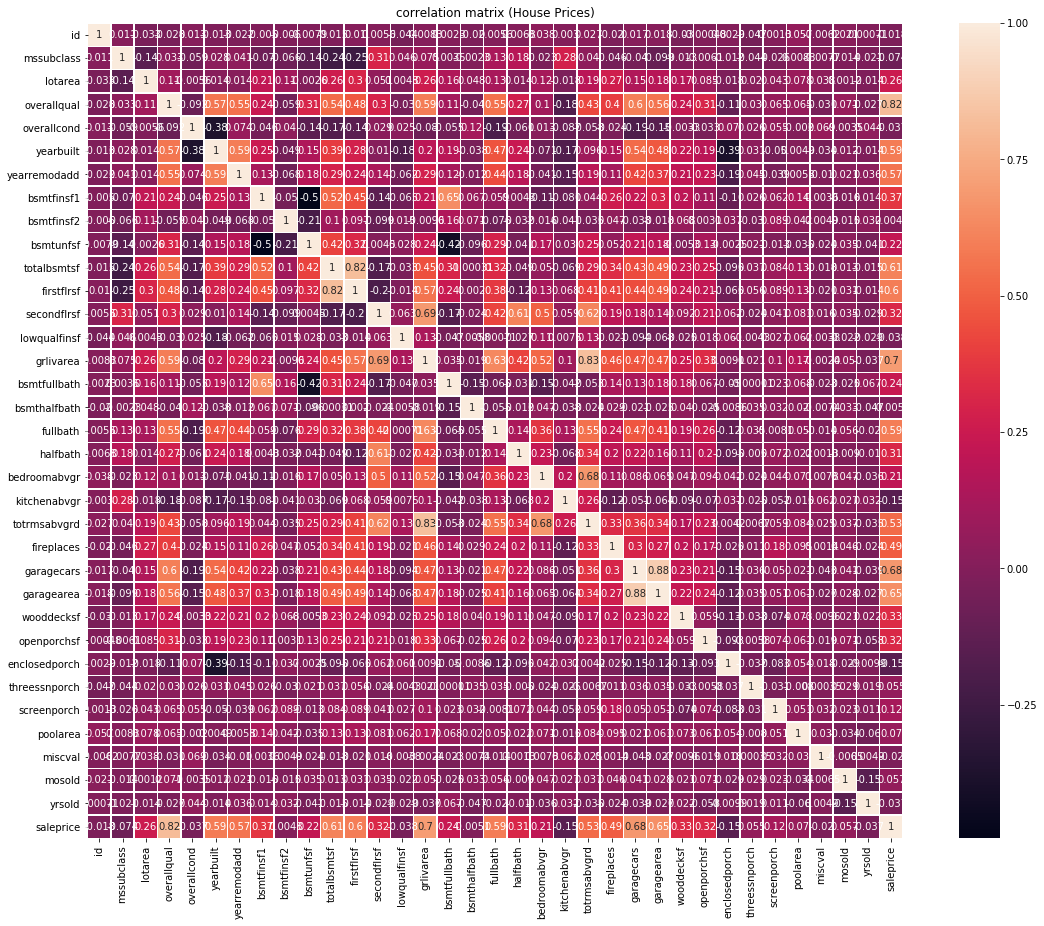

In [29]:
import seaborn as sns

# make the correlation matrix.
corr_houses = house_prices.corr()

plt.figure(figsize=(20,15))

# draw the heatmap using seaborn.
sns.heatmap(corr_houses, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (House Prices)")

plt.show()

Here we notice that 'yearbuilt' strongly correlate to 'garageyrblt'. Other highly correlating variables include:
-  'totrmsabvgrd' and 'grlivarea'

During our data exploration phase, we noticed categorical variables in our dataset. These categorical variables should be converted into numerical values. For this purpose, let's use Pandas .get_dummies() function to create a separate binary variable which takes 1 or 0 for each of the unique value of the categorical variable. 

In [30]:
house_prices = pd.concat([house_prices,pd.get_dummies(house_prices.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices = pd.concat([house_prices,pd.get_dummies(house_prices.street, prefix="street", drop_first=True)], axis=1)
dummy_cols = list(pd.get_dummies(house_prices.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_cols = dummy_cols + list(pd.get_dummies(house_prices.street, prefix="street", drop_first=True).columns)

**Feature Engineering**

Since the target variable in this dataset is sale price, let's visualize the relationship of sale price along with other features in the dataset.

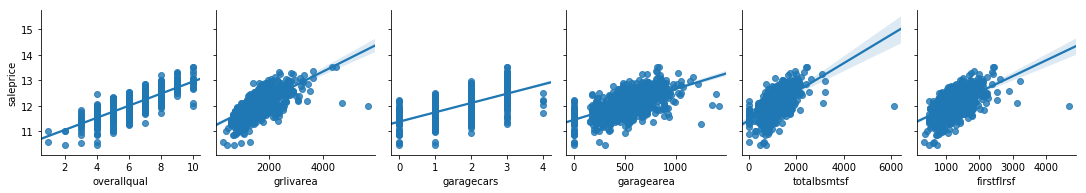

In [35]:
sns.pairplot(data=house_prices,
                  y_vars='saleprice',
                  x_vars=['overallqual','grlivarea','garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf'], kind="reg")

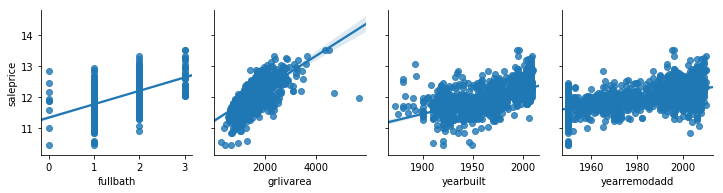

In [39]:
# Additional features
sns.pairplot(data=house_prices,
                  y_vars='saleprice',
                  x_vars=['fullbath','grlivarea','yearbuilt', 'yearremodadd'], kind="reg")

I will select the above features to build our model since they are highly correlated with saleprice.

# Regression Model

Now let's split the dataset into Train and Test:

In [41]:
import statsmodels.api as sm

# Y is the target variable
Y = house_prices['saleprice']
# X is the feature set
X = house_prices[['overallqual','grlivarea','garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf'] + dummy_cols]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     620.8
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:44:04   Log-Likelihood:                 541.21
No. Observations:                1460   AIC:                            -1058.
Df Residuals:                    1448   BIC:                            -995.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.1807      0.079    128.636      0.000      10.025      10.336
overallqual     0.1205      0.005     25.088      0.000       0.111       0.130
grlivarea       0.0002   1.16e-05     17.542      0.000       0.000       0.000
garagecars      0.0986      0.013      7.535      0.000       0.073       0.124
garagearea   4.617e-05   4.56e-05      1.011      0.312   -4.34e-05       0.000
totalbsmtsf     0.0001   1.87e-05      6.341      0.000    8.17e-05       0.000
firstflrsf  -7.359e-07   2.21e-05     -0.033      0.973   -4.41e-05    4.26e-05
mszoning_FV     0.5417      0.060      9.043      0.000       0.424       0.659
mszoning_RH     0.4229      0.069      6.092      0.000       0.287       0.559
mszoning_RL     0.5254      0.056      9.420      0.000       0.416       0.635
mszoning_RM     0.3573      0.056      6.331      0.000       0.247       0.468
street_Pave    -0.0174      0.071     -0.244      0.807      -0.157       0.122
==============================================================================
Omnibus:                      825.484   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25204.444
Skew:                          -2.065   Prob(JB):                         0.00
Kurtosis:                      22.931   Cond. No.                     6.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statistically significant variables are overallqual, grlivarea, garagecars, totalbsmtsf, mszoning_FV, mszoning_RH, mszoning_RL, and mszoning_RM. All the other variables are statistically insignificant and hence their coefficients are statistically zero. 

**Evaluating our Results**

- R-squared and the adjusted R-squared of our model is 0.825 and 0.824.
- F statistics shows a probability of 0.
- AIC and BIC scores are -1058 and -995.

Let's now make predictions of our model.

In [42]:
# X is the feature set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)


# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.8212640965229006
-----Test set statistics-----
R-squared of the model in the test set is: 0.8338596684182863
Mean absolute error of the prediction is: 0.12325593228610954
Mean squared error of the prediction is: 0.027703548369400914
Root mean squared error of the prediction is: 0.16644382947229047
Mean absolute percentage error of the prediction is: 1.0313322339216935


Let's now build several linear regression models and evaluate their results along with our original model.

**Ridge Regression**

In [43]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0013312764353405893
Mean absolute error of the prediction is: 0.3178263906622543
Mean squared error of the prediction is: 0.16696986930519447
Root mean squared error of the prediction is: 0.4086194676042668
Mean absolute percentage error of the prediction is: 2.6437833835698785


**Lasso Regression**

In [45]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0013312764353405893
Mean absolute error of the prediction is: 0.3178263906622543
Mean squared error of the prediction is: 0.16696986930519447
Root mean squared error of the prediction is: 0.4086194676042668
Mean absolute percentage error of the prediction is: 2.6437833835698785


**ElasticNet Regression**

In [46]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0013312764353405893
Mean absolute error of the prediction is: 0.3178263906622543
Mean squared error of the prediction is: 0.16696986930519447
Root mean squared error of the prediction is: 0.4086194676042668
Mean absolute percentage error of the prediction is: 2.6437833835698785


**Result:**

Based on our models above it is evident that te best model for the prediction of housing prices is the OLS Model. 

Since we have only been using the variables in provided in our dataset, let us now try to find if house prices can also be affected by other external factors.

**Analyzing the effect of house prices with external factors**

The data for this dataset were gathers during the period 2006 through 2010. Our dataset does not include the economy of Ames Iowa. Therefore, I am curious in finding if interest rates had an impact on housing prices. As we all know, the US market went through a major recession during the periods 2007 through 2009. Can this have affected our housing prices?

In [48]:
'This dataset contains house sales made between {} and {}.'.format(min(house_prices['yrsold']),max(house_prices['yrsold']))

'This dataset contains house sales made between 2006 and 2010.'

In [52]:
features = house_prices[['overallqual','grlivarea','garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf'] + dummy_cols]

In [62]:
# obtained from World Bank
gdp = [13.86,14.48,14.72,14.42,14.96]
int_rate = [5.87, 5.4, 2, 0.5, 0.75]
yrs = [i for i in range(2006,2011)]
gdp = {i:n for i in yrs for n in gdp}
int_rate = {i:n for i in yrs for n in int_rate}

# add the 2 columns
house_prices['gdp'] = [gdp[i] for i in house_prices['yrsold']]
house_prices['int_rate'] = [int_rate[i] for i in house_prices['yrsold']]

In [56]:
# Y is the target variable
Y = house_prices['saleprice']
# X is the feature set
X = house_prices[['overallqual','grlivarea','garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'gdp', 'int_rate']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     937.4
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:34:29   Log-Likelihood:                 424.43
No. Observations:                1460   AIC:                            -834.9
Df Residuals:                    1453   BIC:                            -797.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
overallqual     0.1292      0.005     25.536      0.000       0.119       0.139
grlivarea       0.0002   1.25e-05     15.277      0.000       0.000       0.000
garagecars      0.1089      0.014      7.726      0.000       0.081       0.137
garagearea   4.017e-05   4.89e-05      0.821      0.412   -5.58e-05       0.000
totalbsmtsf     0.0001   2.02e-05      5.798      0.000    7.73e-05       0.000
firstflrsf   3.767e-05   2.35e-05      1.603      0.109   -8.42e-06    8.38e-05
gdp             0.7046      0.002    461.515      0.000       0.702       0.708
int_rate        0.0353   7.65e-05    461.515      0.000       0.035       0.035
==============================================================================
Omnibus:                      839.624   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19887.985
Skew:                          -2.204   Prob(JB):                         0.00
Kurtosis:                      20.536   Cond. No.                     1.15e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.01e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
# X is the feature set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)


# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.7900617949463871
-----Test set statistics-----
R-squared of the model in the test set is: 0.8102419551504804
Mean absolute error of the prediction is: 0.1285338576755934
Mean squared error of the prediction is: 0.03164175202928408
Root mean squared error of the prediction is: 0.17788128633806333
Mean absolute percentage error of the prediction is: 1.076670319956512


Here's we used the external source of information from World Bank. My main concern was to see how the economy affected the housing market during 2006 and 2010 in Ames, Iowa. 

Running our new features through the OLS Regression model give us the following results:
- R-squared is 0.795 and adjusted R-squared is 0.794 respectively.
- F statistics probability is 0.
- AIC and BIC scores are: -834.9 and -797.8
- Statistically significant variables: 'overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'gdp', and 'int_rate'

It appears that our economic factors are also highly correlated with the housing prices. Let's apply another Linear Regression algorithm to see if our results still hold true.

In [61]:
# Lasso Regression

from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0013312764353405893
Mean absolute error of the prediction is: 0.3178263906622543
Mean squared error of the prediction is: 0.16696986930519447
Root mean squared error of the prediction is: 0.4086194676042668
Mean absolute percentage error of the prediction is: 2.6437833835698785


The Lasso Regression does not show any improvement. Therefore, we could conclude that the best models for analyzing external factors is the OLS Regression.

# Summary (Conclusion)

In this challenge we analyzed the housing prices of Ames Iowa for the period 2006-2010. The data was gathered from Kaggle and my goal was to find the best Linear Regression model and create a separate model to see if external factors affected the housing market. For this purpose, I performed the following:

- Loaded the dataset through Pandas wrapper method
- Explored the dataset for missing values and outliers 
- Performed descriptive statistics and graphically visualized to determine normality
- Eliminated missing values and outliers
- Feature engineered to determine which features were more appropriate for our model
- Split the data into the test and training set
- Built the OLS regression model 
- Created other regression models and compared results
- Determined how other external features affected SalePrice.

Conclusion: During our model prediction we were able to derive better results for our features with external factors and without external factors through the OLS Regression model.